# 边缘检测-非极大值抑制实现Sobel检测

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
src = cv2.imread('../datas/f2.jpg')
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
rgb_f = rgb.astype(np.float32)

In [24]:
def nonmaximum_suppression_sobel(src):
    # 1.转换图像类型为float
    gray = np.float32(src)
    if len(src.shape) > 2:
        gray = np.float32(cv2.cvtColor(src,cv2.COLOR_RGB2GRAY))
    rows,cols = gray.shape
    dst_x = np.zeros_like(gray)
    #dst_y = np.zeros_like(gray)
    dst = np.zeros_like(gray)
    # 2.定义水平或垂直Sobel算子
    sobel_x = np.array([
        [-0.125,0,0.125],
        [-0.25,0,0.25],
        [-0.125,0,0.125]
    ])
    
    # 3.卷积运算
    dst_x = cv2.filter2D(gray,-1,sobel_x)
    
    # 4.计算图像梯度
    grad = cv2.multiply(dst_x,dst_x)
    
    # 5.根据梯度幅度设置阈值
    scale_value = 1.0
    thresh = scale_value * np.mean(grad)
    
    # 6.非极大值抑制计算
    for i in range(1,rows - 1):
        for j in range(1,cols - 1):
            b1 = grad[i,j] > grad[i,j - 1]
            b2 = grad[i,j] > grad[i,j + 1]
            b3 = grad[i,j] > grad[i - 1,j]
            b4 = grad[i,j] > grad[i + 1,j]
            
            # 7.判断邻域梯度是否满足大于水平或垂直条件，并根据自适应域值二值化
            if (grad[i,j] > thresh) and ((b1 and b2) or (b3 and b4)):
                dst[i,j] = 255
                
    return np.uint8(dst)
            

In [26]:
dst = nonmaximum_suppression_sobel(gray)

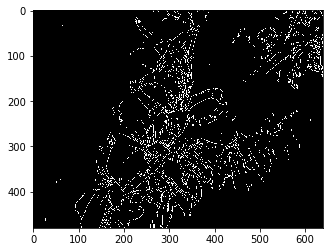

In [27]:
plt.imshow(dst,'gray')

In [28]:
"""
    Non-max Suppression Algorithm
    @param list  Object candidate bounding boxes
    @param list  Confidence score of bounding boxes
    @param float IoU threshold
    @return Rest boxes after nms operation
"""
def nms(bounding_boxes, confidence_score, threshold):
    # If no bounding boxes, return empty list
    if len(bounding_boxes) == 0:
        return [], []

    # Bounding boxes
    boxes = np.array(bounding_boxes)

    # coordinates of bounding boxes
    start_x = boxes[:, 0]
    start_y = boxes[:, 1]
    end_x = boxes[:, 2]
    end_y = boxes[:, 3]

    # Confidence scores of bounding boxes
    score = np.array(confidence_score)

    # Picked bounding boxes
    picked_boxes = []
    picked_score = []

    # Compute areas of bounding boxes
    areas = (end_x - start_x + 1) * (end_y - start_y + 1)

    # Sort by confidence score of bounding boxes
    order = np.argsort(score)

    # Iterate bounding boxes
    while order.size > 0:
        # The index of largest confidence score
        index = order[-1]

        # Pick the bounding box with largest confidence score
        picked_boxes.append(bounding_boxes[index])
        picked_score.append(confidence_score[index])

        # Compute ordinates of intersection-over-union(IOU)
        x1 = np.maximum(start_x[index], start_x[order[:-1]])
        x2 = np.minimum(end_x[index], end_x[order[:-1]])
        y1 = np.maximum(start_y[index], start_y[order[:-1]])
        y2 = np.minimum(end_y[index], end_y[order[:-1]])

        # Compute areas of intersection-over-union
        w = np.maximum(0.0, x2 - x1 + 1)
        h = np.maximum(0.0, y2 - y1 + 1)
        intersection = w * h

        # Compute the ratio between intersection and union
        ratio = intersection / (areas[index] + areas[order[:-1]] - intersection)

        left = np.where(ratio < threshold)
        order = order[left]

    return picked_boxes, picked_score

参考：

[1]. OpenCV图像处理编程实例